In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_circles # To make dummy concentric circles dataset

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense , BatchNormalization

In [36]:
## Generating Binary Classification Dataset

x,y = make_circles(n_samples=1000, noise=0.15, random_state=1)

In [37]:
x

array([[ 0.99336277, -0.10296644],
       [-0.55191343, -0.82996956],
       [ 0.97521366, -0.78875335],
       ...,
       [ 0.29964728, -0.58043855],
       [-0.90139918,  0.0067097 ],
       [ 1.10561302,  0.59898268]])

In [38]:
y

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,

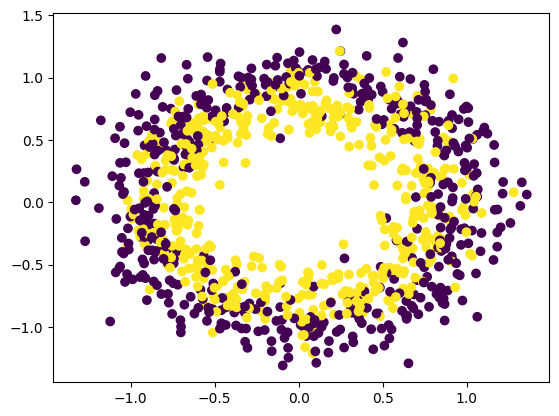

In [39]:
## Data Visualization

plt.scatter(x[:,0], x[:,1], c=y)

# ANN Without Batch Normalization

In [54]:
## Building Ann

model = Sequential()
model.add(Dense(3, activation = 'relu', input_dim=2))
model.add(Dense(2, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 3)                 9         
                                                                 
 dense_13 (Dense)            (None, 2)                 8         
                                                                 
 dense_14 (Dense)            (None, 1)                 3         
                                                                 
Total params: 20 (80.00 Byte)
Trainable params: 20 (80.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
## Training the model

model.compile(loss= 'binary_crossentropy' , optimizer = 'adam', metrics=['accuracy'])
history = model.fit(x,y, epochs = 200 , validation_split=0.2)

Epoch 1/200
25/25 [==============================] - 2s 9ms/step - loss: 0.6417 - accuracy: 0.6275 - val_loss: 0.6386 - val_accuracy: 0.6200
Epoch 2/200
25/25 [==============================] - 0s 5ms/step - loss: 0.6416 - accuracy: 0.6300 - val_loss: 0.6378 - val_accuracy: 0.6150
Epoch 3/200
25/25 [==============================] - 0s 5ms/step - loss: 0.6412 - accuracy: 0.6313 - val_loss: 0.6380 - val_accuracy: 0.6200
Epoch 4/200
25/25 [==============================] - 0s 5ms/step - loss: 0.6410 - accuracy: 0.6313 - val_loss: 0.6379 - val_accuracy: 0.6150
Epoch 5/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6413 - accuracy: 0.6288 - val_loss: 0.6378 - val_accuracy: 0.6200
Epoch 6/200
25/25 [==============================] - 0s 5ms/step - loss: 0.6411 - accuracy: 0.6275 - val_loss: 0.6377 - val_accuracy: 0.6150
Epoch 7/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6410 - accuracy: 0.6300 - val_loss: 0.6377 - val_accuracy: 0.6200
Epoch 8/200
2

9600/9600 [==============================] - 15s 2ms/step


<Axes: >

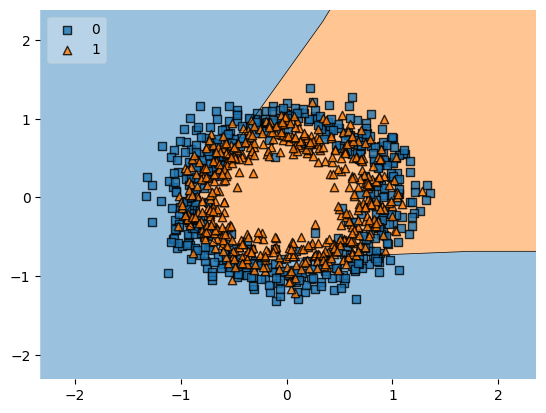

In [57]:
## Checking the decision regions

from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x,y, clf =model , legend=2)

## ANN with Batch Normalization

In [60]:
## Building Ann

model = Sequential()
model.add(Dense(3, activation = 'relu', input_dim=2))
model.add(BatchNormalization())
model.add(Dense(2, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 3)                 9         
                                                                 
 batch_normalization_7 (Bat  (None, 3)                 12        
 chNormalization)                                                
                                                                 
 dense_19 (Dense)            (None, 2)                 8         
                                                                 
 batch_normalization_8 (Bat  (None, 2)                 8         
 chNormalization)                                                
                                                                 
 dense_20 (Dense)            (None, 1)                 3         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 30 (1

In [61]:
## Training the model

model.compile(loss= 'binary_crossentropy' , optimizer = 'adam', metrics=['accuracy'])
history1 = model.fit(x,y, epochs = 200 , validation_split=0.2)

Epoch 1/200
25/25 [==============================] - 2s 13ms/step - loss: 0.7301 - accuracy: 0.5163 - val_loss: 0.6921 - val_accuracy: 0.5300
Epoch 2/200
25/25 [==============================] - 0s 5ms/step - loss: 0.7142 - accuracy: 0.5300 - val_loss: 0.6920 - val_accuracy: 0.4950
Epoch 3/200
25/25 [==============================] - 0s 4ms/step - loss: 0.7044 - accuracy: 0.5350 - val_loss: 0.6922 - val_accuracy: 0.4800
Epoch 4/200
25/25 [==============================] - 0s 5ms/step - loss: 0.6968 - accuracy: 0.5312 - val_loss: 0.6928 - val_accuracy: 0.4900
Epoch 5/200
25/25 [==============================] - 0s 5ms/step - loss: 0.6941 - accuracy: 0.5400 - val_loss: 0.6933 - val_accuracy: 0.4800
Epoch 6/200
25/25 [==============================] - 0s 5ms/step - loss: 0.6912 - accuracy: 0.5350 - val_loss: 0.6942 - val_accuracy: 0.4850
Epoch 7/200
25/25 [==============================] - 0s 5ms/step - loss: 0.6910 - accuracy: 0.5512 - val_loss: 0.6949 - val_accuracy: 0.4850
Epoch 8/200


9600/9600 [==============================] - 16s 2ms/step


<Axes: >

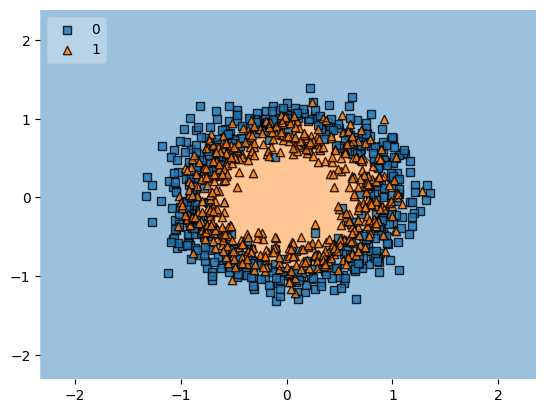

In [62]:
## Checking the decision regions

from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x,y, clf =model , legend=2)

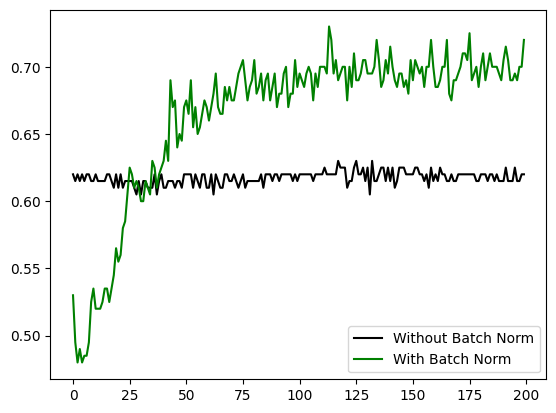

In [63]:
## Comparing the Validation Accuracy for both cases

plt.plot(history.history['val_accuracy'], color = 'black', label = 'Without Batch Norm')
plt.plot(history1.history['val_accuracy'], color = 'green', label = 'With Batch Norm')
plt.legend()
plt.show()

In [64]:
## Clearly the ANN with Batch Normalization giving good results